#**Four STECU**

---



Nama Anggota :

                   - Johanes Efata Putra Diaz Prasetiyo / 24083010016
                   - Praja Lohphinesti Subiarto / 24083010060
                   - Daffa Muhammad Khrishadi / 24083010062
                   - Muhammad Rudmardiansyah Pratama Putra / 24083010108
                   
                   

              


# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

**DATA DICTIONARY**

DATE = Tanggal pengamatan cuaca dalam format YYYYMMDD (contoh: 20000101 berarti 1 Januari 2000)

MONTH = Bulan pengamatan (1–12), digunakan untuk melihat pola musiman

cloud_cover = Tingkat tutupan awan harian, menunjukkan seberapa mendung langit (0 = cerah, 8 = mendung total)

wind_speed = Kecepatan angin rata-rata harian (m/s)

wind_gust = Kecepatan angin maksimum dalam satu hari (m/s)

humidity = Kelembapan relatif udara (0–1), semakin tinggi berarti udara makin lembap

pressure = Tekanan udara harian (bar atau kilopascal), menggambarkan kondisi atmosfer

global_radiation = Jumlah energi radiasi matahari yang diterima permukaan bumi per hari (kWh/m²)

precipitation = Curah hujan harian (mm), menunjukkan banyaknya air hujan yang turun

sunshine = Lama penyinaran matahari (jam per hari)

temp_mean = Suhu rata-rata harian (°C)

temp_min = Suhu minimum harian (°C)

temp_max = Suhu maksimum harian (°C)

# Preparation Data

In [ ]:
df = pd.read_csv('weather_prediction_dataset.csv')
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("kolom yang Cocok untuk Korelasi")
print(num_cols)

kolom yang Cocok untuk Korelasi
['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'DE_BILT_cloud_cover', 'DE_BILT_wind_speed', 'DE_BILT_wind_gust', 'DE_BILT_humidity', 'DE_BILT_pressure', 'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine', 'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust', 'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_wind_gust', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSS

In [ ]:
# ambil semua kolom numerik
cols_cocok = [col for col in df.columns if '_' in col]
cities = sorted(set(col.split('_')[0] for col in cols_cocok))

# indikator tiap kota
city_data = {}
for city in cities:
    indikator = [col.split('_', 1)[1] for col in cols_cocok if col.startswith(city + '_')]
    if len(indikator) >= 5:  # ambil kota dengan minimal 5 indikator
        city_data[city] = indikator

print(f"Kota dengan minimal 5 indikator: {len(city_data)} kota")

# bentuk df rapih
records = []
for city, indikator in city_data.items():
    record = {'city': city}
    for feat in indikator:
        col_name = f"{city}_{feat}"
        if col_name in df.columns:
            record[feat] = df[col_name].mean()  # ambil rata-rata per indikator
    records.append(record)

df_clean = pd.DataFrame(records)

display(df_clean.head())
print(df_clean.shape)
df_clean.info()

Kota dengan minimal 5 indikator: 18 kota


,city,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,...,BILT_humidity,BILT_pressure,BILT_global_radiation,BILT_precipitation,BILT_sunshine,BILT_temp_mean,BILT_temp_min,BILT_temp_max,wind_speed,wind_gust
0,BASEL,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUDAPEST,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,NaN,16.629091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.817882,1.015299,1.190903,0.236888,4.744444,10.70353,6.397099,14.798604,NaN,NaN
3,DRESDEN,5.405036,0.759023,NaN,1.263432,0.175881,4.815736,9.800629,5.924056,13.671346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.256924,10.924576
4,DUSSELDORF,5.141762,0.755744,1.016000,1.147362,0.218043,4.324111,11.142009,6.865736,15.312014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.963738,10.591680


(18, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   18 non-null     object 
 1   cloud_cover            12 non-null     float64
 2   humidity               15 non-null     float64
 3   pressure               14 non-null     float64
 4   global_radiation       15 non-null     float64
 5   precipitation          16 non-null     float64
 6   sunshine               13 non-null     float64
 7   temp_mean              17 non-null     float64
 8   temp_min               16 non-null     float64
 9   temp_max               17 non-null     float64
 10  BILT_cloud_cover       1 non-null      float64
 11  BILT_wind_speed        1 non-null      float64
 12  BILT_wind_gust         1 non-null      float64
 13  BILT_humidity          1 non-null      float64
 14  BILT_pressure          1 non-null      float64
 15 

In [ ]:
# Hapus kolom yang penuh NaN (misal semua 17 NaN = tidak berguna)
df_clean2 = df_clean.dropna(axis=1, thresh=len(df_clean)-5)  # kolom akan tetap disimpan kalau punya minimal data di 5 kota.

# Isi NaN kecil dengan mean kolomnya
df_clean2 = df_clean2.fillna(df_clean2.mean(numeric_only=True))


Dataset cuaca harian yang dibaca ke dalam DataFrame bernama df berisi informasi dari berbagai kota seperti BASEL, DUSSELDORF, dan BUDAPEST. Secara struktural, data ini terdiri dari kolom DATE, MONTH, serta ratusan kolom lain (sekitar 165 kolom) yang merepresentasikan berbagai indikator cuaca tiap kota, misalnya Cloud Cover, Humidity, Pressure, hingga Temperature Max. Untuk memudahkan analisis, dilakukan proses pembersihan dan transformasi kolom dengan memisahkan nama kolom berdasarkan kota, kemudian menyusun ulang (melalui penggabungan atau reshape) agar setiap kota memiliki struktur indikator yang seragam. Setelah transformasi, data diperiksa untuk memastikan tipe data (banyak bertipe float64 dan object) serta kelengkapan nilai di tiap kota, guna menjamin bahwa setiap indikator cuaca terisi dengan benar dan siap digunakan untuk analisis lebih lanjut.



# Data Understanding

In [ ]:
print("informasi Struktur Data")
df_clean2.info()

print("\nukuran df:")
print(f"Jumlah baris (kota): {df_clean2.shape[0]}")
print(f"Jumlah kolom (indikator): {df_clean2.shape[1]}")


informasi Struktur Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              18 non-null     object 
 1   humidity          18 non-null     float64
 2   pressure          18 non-null     float64
 3   global_radiation  18 non-null     float64
 4   precipitation     18 non-null     float64
 5   sunshine          18 non-null     float64
 6   temp_mean         18 non-null     float64
 7   temp_min          18 non-null     float64
 8   temp_max          18 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.4+ KB

ukuran df:
Jumlah baris (kota): 18
Jumlah kolom (indikator): 9


In [ ]:
# missing values
print("cek missing values")
missing_count = df_clean2.isnull().sum()
missing_count

cek missing values


,0
city,0
humidity,0
pressure,0
global_radiation,0
precipitation,0
sunshine,0
temp_mean,0
temp_min,0
temp_max,0


In [ ]:
# statistik deskriptif
print("Statistik Deskriptif Data Numerik")
display(df_clean2.describe().T)

Statistik Deskriptif Data Numerik


,count,mean,std,min,25%,50%,75%,max
humidity,18.0,0.744891,0.047053,0.651522,0.736755,0.744891,0.758857,0.853952
pressure,18.0,1.015836,0.001856,1.011074,1.015836,1.016018,1.016861,1.017947
global_radiation,18.0,1.377285,0.190099,1.047244,1.213586,1.377285,1.455722,1.711773
precipitation,18.0,0.230164,0.094451,0.136442,0.176481,0.219346,0.238556,0.541475
sunshine,18.0,5.031757,0.654669,4.136836,4.699829,5.031757,5.084048,7.162397
temp_mean,18.0,10.369165,4.429662,-4.626327,9.635913,10.931513,12.086734,16.059579
temp_min,18.0,6.325168,3.849326,-6.884319,5.728448,6.590019,7.663342,11.615900
temp_max,18.0,14.485255,4.991864,-2.352244,13.708935,15.058976,16.501847,21.103229


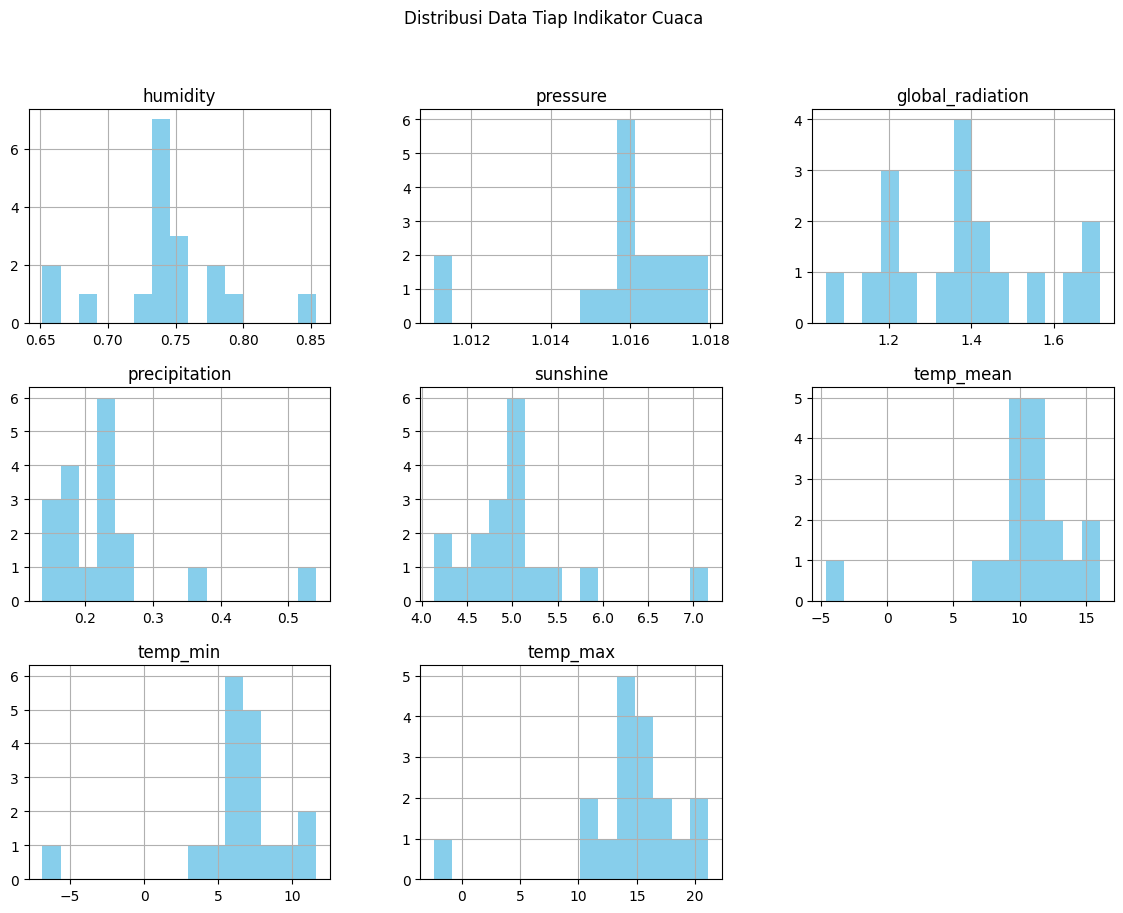

In [ ]:
#distribusi
df_clean2.drop(columns='city').hist(figsize=(14,10), bins=15, color='skyblue')
plt.suptitle("Distribusi Data Tiap Indikator Cuaca")
plt.show()

Dataset cuaca yang dianalisis terdiri dari 18 baris dan 9 kolom yang memuat berbagai indikator meteorologi seperti kelembapan, tekanan udara, radiasi matahari, curah hujan, penyinaran, dan suhu. Hasil pemeriksaan menunjukkan tidak ada nilai hilang sehingga data dinilai bersih dan siap dianalisis. Statistik deskriptif mengungkap bahwa tekanan udara relatif stabil, sementara radiasi matahari dan curah hujan menunjukkan variasi tinggi akibat perbedaan kondisi harian. Suhu rata-rata sekitar 10°C menggambarkan iklim sedang tanpa ekstrem panas atau dingin. Visualisasi distribusi data memperlihatkan sebagian besar variabel memiliki sebaran sempit dengan sedikit pencilan, menandakan kestabilan data. Secara keseluruhan, dataset ini lengkap, konsisten, dan dapat dijadikan dasar yang kuat untuk analisis cuaca lanjutan atau pemodelan prediksi berbasis data.

# Korelasi & Visualisasi

Korelasi Pearson antar Indikator Cuaca


,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
humidity,1.000000,-0.050737,-0.246015,0.569604,-0.325141,-0.689763,-0.658664,-0.686483
pressure,-0.050737,1.000000,0.331585,0.184616,0.003978,0.255278,0.194399,0.281642
global_radiation,-0.246015,0.331585,1.000000,0.324503,0.503650,0.011182,-0.013488,0.014618
precipitation,0.569604,0.184616,0.324503,1.000000,0.016665,-0.693292,-0.706940,-0.664858
sunshine,-0.325141,0.003978,0.503650,0.016665,1.000000,0.310781,0.272793,0.326560
temp_mean,-0.689763,0.255278,0.011182,-0.693292,0.310781,1.000000,0.992439,0.998182
temp_min,-0.658664,0.194399,-0.013488,-0.706940,0.272793,0.992439,1.000000,0.986977
temp_max,-0.686483,0.281642,0.014618,-0.664858,0.326560,0.998182,0.986977,1.000000


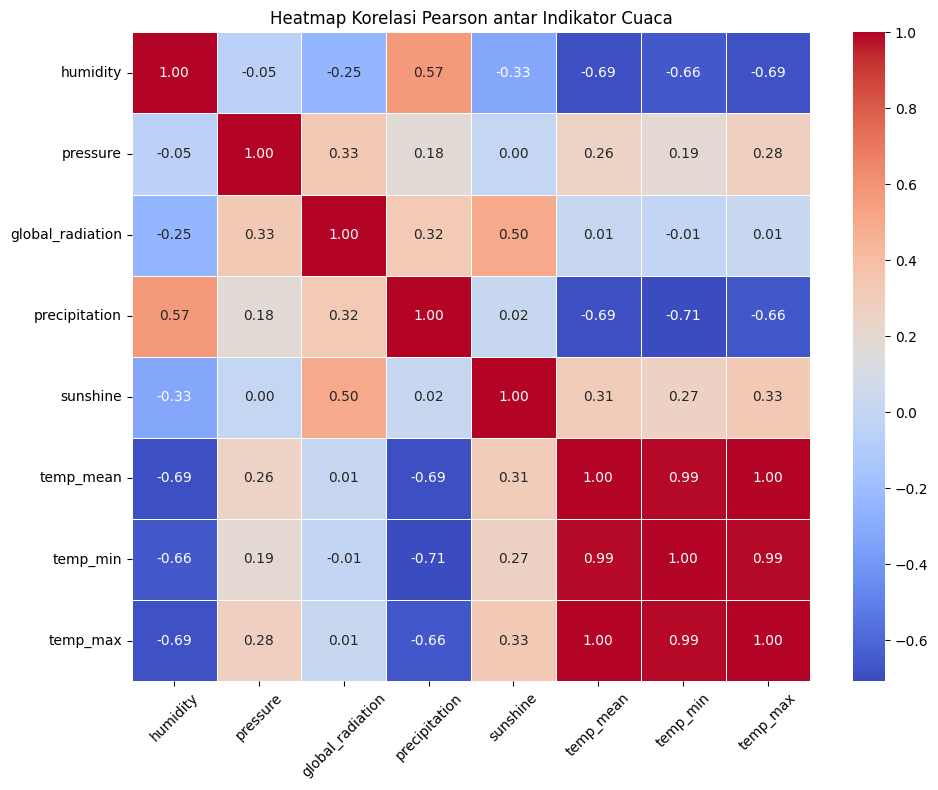

In [ ]:
# korelasi pearson
print("Korelasi Pearson antar Indikator Cuaca")
corr_pearson = df_clean2.drop(columns='city').corr(method='pearson')
display(corr_pearson)

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Pearson antar Indikator Cuaca")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Korelasi Spearman antar Indikator Cuaca


,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
humidity,1.000000,-0.167360,-0.471503,0.077600,-0.642656,-0.416754,-0.335231,-0.460187
pressure,-0.167360,1.000000,0.274430,0.285940,0.164572,0.402495,0.371047,0.481334
global_radiation,-0.471503,0.274430,1.000000,0.107605,0.719983,0.354706,0.292809,0.391935
precipitation,0.077600,0.285940,0.107605,1.000000,0.012520,-0.133196,-0.038740,-0.099122
sunshine,-0.642656,0.164572,0.719983,0.012520,1.000000,0.305543,0.180499,0.349341
temp_mean,-0.416754,0.402495,0.354706,-0.133196,0.305543,1.000000,0.953020,0.989680
temp_min,-0.335231,0.371047,0.292809,-0.038740,0.180499,0.953020,1.000000,0.932370
temp_max,-0.460187,0.481334,0.391935,-0.099122,0.349341,0.989680,0.932370,1.000000


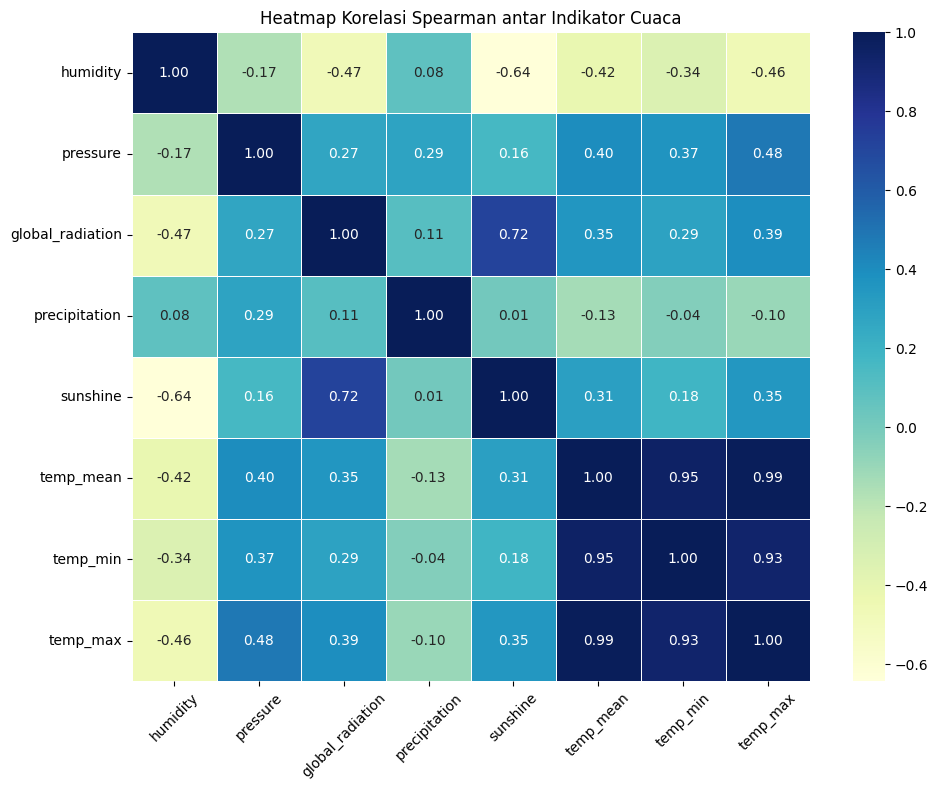

In [ ]:
# korelasi spearman
print("Korelasi Spearman antar Indikator Cuaca")
corr_spearman = df_clean2.drop(columns='city').corr(method='spearman')
display(corr_spearman)

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_spearman, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Spearman antar Indikator Cuaca")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Korelasi Kendall antar Indikator Cuaca


,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
humidity,1.000000,-0.060609,-0.453333,0.059604,-0.471124,-0.264039,-0.245038,-0.303645
pressure,-0.060609,1.000000,0.168359,0.173937,0.110355,0.286724,0.267596,0.353404
global_radiation,-0.453333,0.168359,1.000000,0.033113,0.566715,0.277241,0.231793,0.316847
precipitation,0.059604,0.173937,0.033113,1.000000,0.013566,-0.078689,-0.032895,-0.039344
sunshine,-0.471124,0.110355,0.566715,0.013566,1.000000,0.196058,0.122091,0.236622
temp_mean,-0.264039,0.286724,0.277241,-0.078689,0.196058,1.000000,0.878693,0.934641
temp_min,-0.245038,0.267596,0.231793,-0.032895,0.122091,0.878693,1.000000,0.839349
temp_max,-0.303645,0.353404,0.316847,-0.039344,0.236622,0.934641,0.839349,1.000000


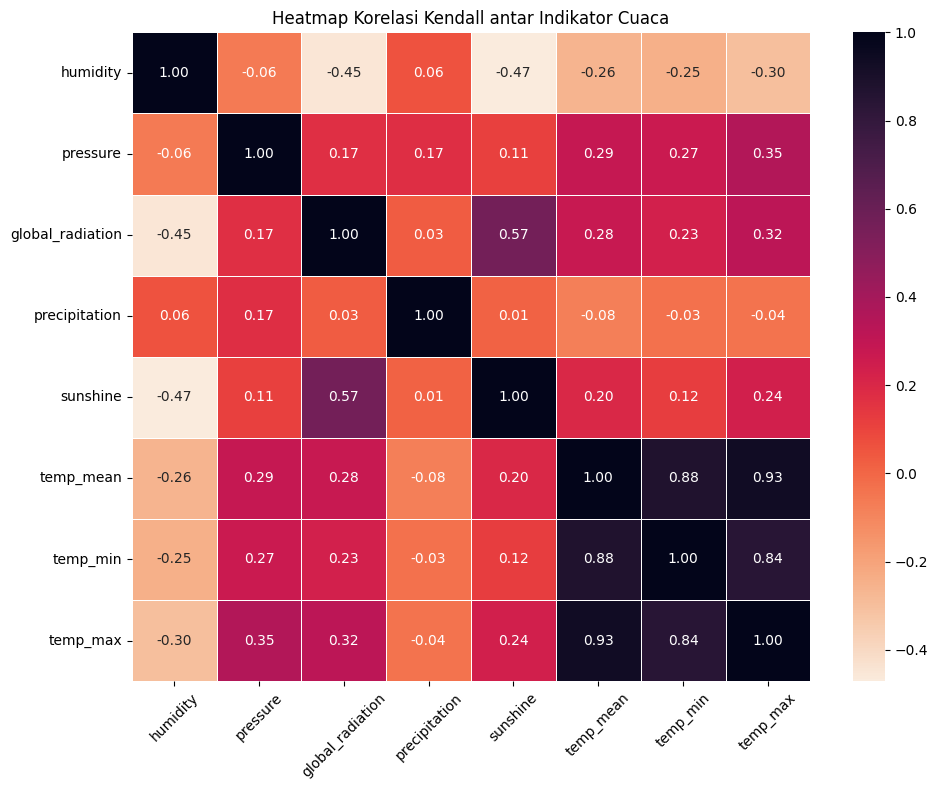

In [ ]:
# korelasi kendall
print("Korelasi Kendall antar Indikator Cuaca")
corr_kendall = df_clean2.drop(columns='city').corr(method='kendall')
display(corr_kendall)

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_kendall, annot=True, cmap='rocket_r', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Kendall antar Indikator Cuaca")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Analisis korelasi menggunakan tiga metode Pearson, Spearman, dan Kendall menunjukkan pola hubungan yang konsisten antarindikator cuaca. Hasil uji Pearson memperlihatkan bahwa suhu rata-rata, minimum, dan maksimum memiliki korelasi positif sangat kuat (≥0.98), menandakan ketiganya bergerak naik-turun bersama, sementara kelembapan berkorelasi negatif kuat terhadap suhu dan positif terhadap curah hujan, sehingga udara yang lembap cenderung disertai suhu rendah dan peningkatan presipitasi. Korelasi Spearman mengonfirmasi pola tersebut dalam hubungan monotonic, di mana urutan kenaikan kelembapan sejalan dengan penurunan suhu dan sinar matahari, serta memperlihatkan hubungan positif tinggi antara global radiation dan sunshine (0.72). Sementara itu, analisis Kendall menegaskan arah korelasi yang sama namun dengan nilai lebih kecil, menunjukkan hubungan kuat hanya pada variabel suhu dan radiasi, serta hubungan berlawanan arah antara kelembapan dan suhu. Secara keseluruhan, ketiga metode menyimpulkan bahwa hubungan paling kuat dan stabil terdapat pada variabel suh, sedangkan kelembapan dan curah hujan menunjukkan pola berlawanan terhadap suhu, konsisten dengan dinamika fisik cuaca pada umumnya.